In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_post_processing as cpp
from scipy import ndimage
import coop_setup_funcs as csf
import warnings
from astropy.visualization import quantity_support
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
# set plot params
import matplotlib as mpl
import scipy as sp
mpl.font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 3}
plt.rcParams.update({'font.size': 14})
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
import healpy as hp

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import stats as st

In [3]:
# Define the distance bins
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
for dbin in dbins:
    print(z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc),z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc))

zbins = ['0pt20_0pt36', '0pt36_0pt53', '0pt53_0pt72', '0pt72_0pt94'] # the z bins for number density maps
actpath  = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
buzzpath = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/"
mask =  "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"

0.19985555905328484 redshift 0.3565167560560754 redshift
0.3565167560560754 redshift 0.5289988643902372 redshift
0.5289988643902372 redshift 0.7215854982816572 redshift
0.7215854982816572 redshift 0.9396687416637612 redshift


In [4]:
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24


Red. chi-squared between fiducial CIB-deproj and no-deproj:
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_893_1393Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_843_1443Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mn

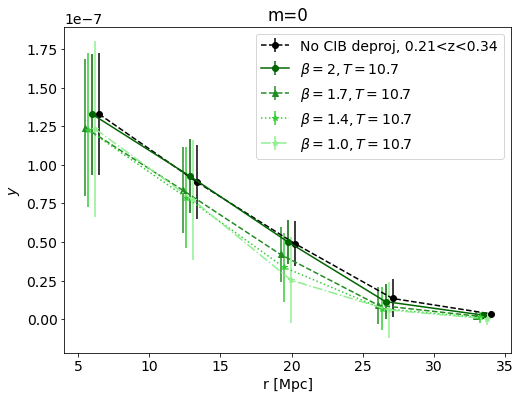

0.9204438963350465 Pearson correlation coefficient
0.9978853078551779 Pearson correlation coefficient
0.9856271407384682 Pearson correlation coefficient
0.9979750424510585 Pearson correlation coefficient
0.9591877844925121 Pearson correlation coefficient


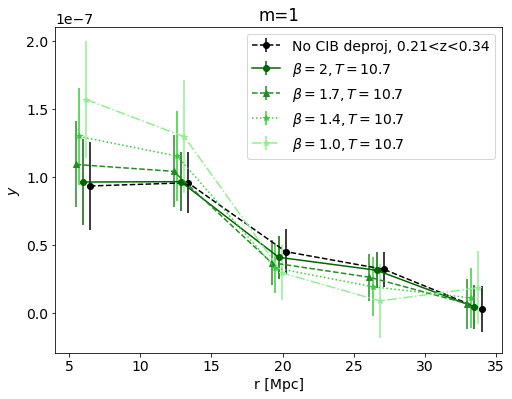

0.8511126526834485 Pearson correlation coefficient
0.9961310841787171 Pearson correlation coefficient
0.9644445782983893 Pearson correlation coefficient
0.99609690767419 Pearson correlation coefficient
0.9173286278182777 Pearson correlation coefficient


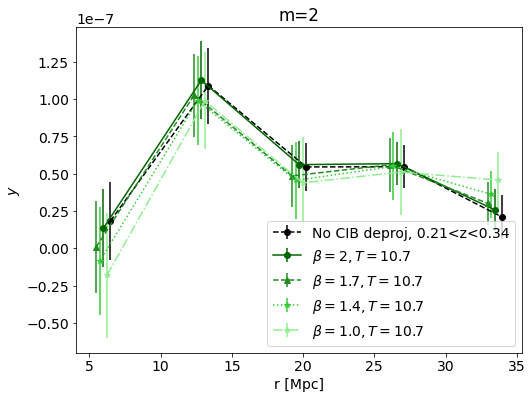

0.8466144759763474 Pearson correlation coefficient
0.9940837115406818 Pearson correlation coefficient
0.9763320341009322 Pearson correlation coefficient
0.9949092426620232 Pearson correlation coefficient
0.9396047593729429 Pearson correlation coefficient


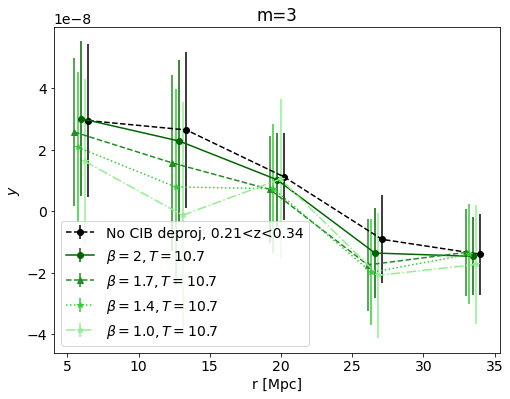

0.7766981782200856 Pearson correlation coefficient
0.9987895373005158 Pearson correlation coefficient
0.9610988297639517 Pearson correlation coefficient
0.9987073766665445 Pearson correlation coefficient
0.8648438759562392 Pearson correlation coefficient


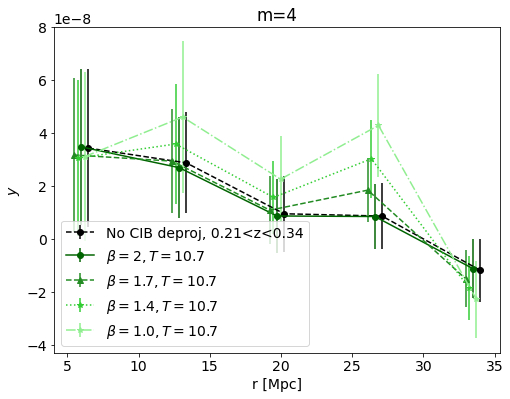

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_1493_1993Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_2043Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc

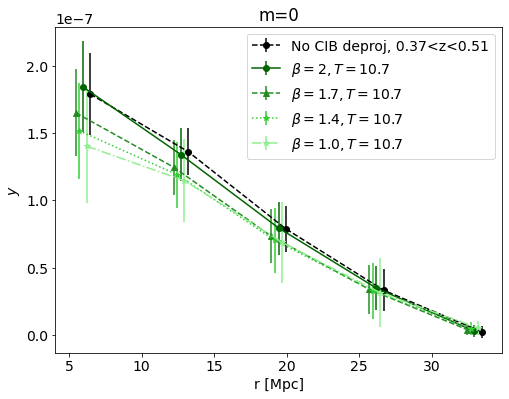

0.8027029965566224 Pearson correlation coefficient
0.9983136943597891 Pearson correlation coefficient
0.9713493855367917 Pearson correlation coefficient
0.9996575518692729 Pearson correlation coefficient
0.9060127576636129 Pearson correlation coefficient


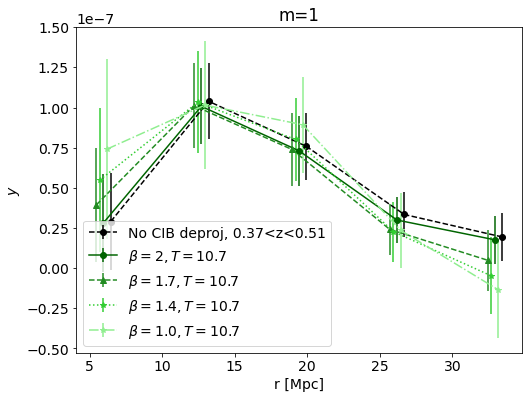

0.7476626891638644 Pearson correlation coefficient
0.9969148274644882 Pearson correlation coefficient
0.9717464615909999 Pearson correlation coefficient
0.9977372664546739 Pearson correlation coefficient
0.8854550545236658 Pearson correlation coefficient


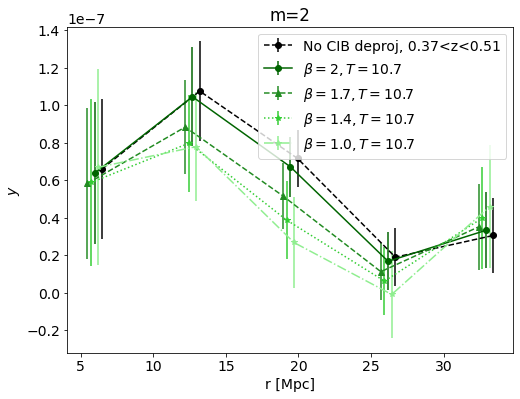

0.9472844931095873 Pearson correlation coefficient
0.9977068682500042 Pearson correlation coefficient
0.9870419621475963 Pearson correlation coefficient
0.9989887870970604 Pearson correlation coefficient
0.9692186950181673 Pearson correlation coefficient


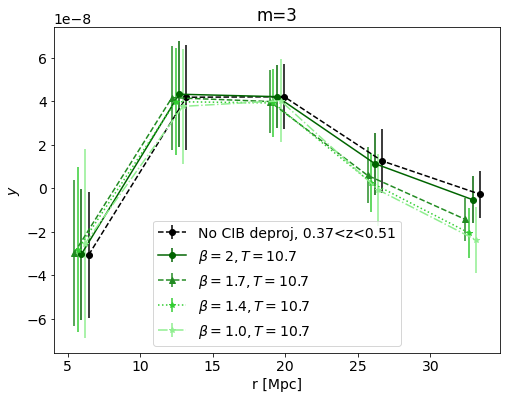

0.8163487725390429 Pearson correlation coefficient
0.9967429831441413 Pearson correlation coefficient
0.9865934870287074 Pearson correlation coefficient
0.9952490386567044 Pearson correlation coefficient
0.9568990133199414 Pearson correlation coefficient


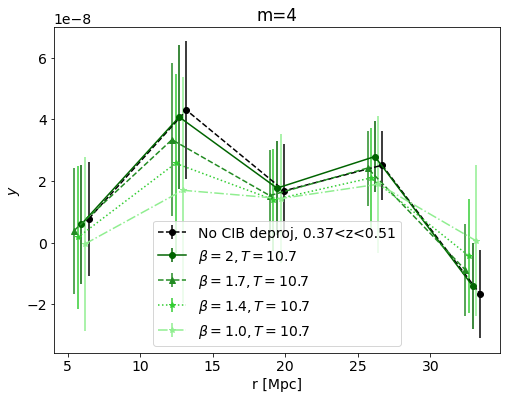

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_2093_2593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2043_2643Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc

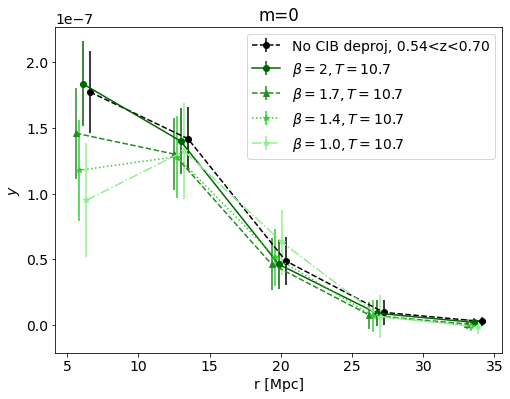

0.9812243114853074 Pearson correlation coefficient
0.9989502365127294 Pearson correlation coefficient
0.9926117752077559 Pearson correlation coefficient
0.9994254043073251 Pearson correlation coefficient
0.9842911372537184 Pearson correlation coefficient


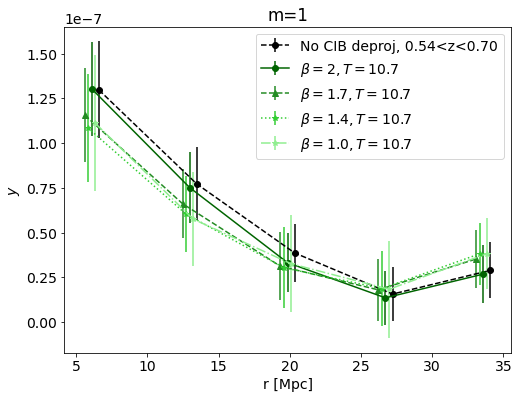

0.9973997561754664 Pearson correlation coefficient
0.9997358587964977 Pearson correlation coefficient
0.9995738587599775 Pearson correlation coefficient
0.9998496475891685 Pearson correlation coefficient
0.9991711998949683 Pearson correlation coefficient


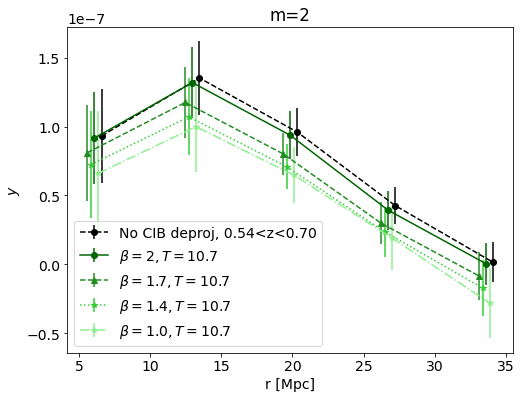

0.9373978707467443 Pearson correlation coefficient
0.997960608470449 Pearson correlation coefficient
0.9969446360150935 Pearson correlation coefficient
0.9982508747306662 Pearson correlation coefficient
0.9806971797047349 Pearson correlation coefficient


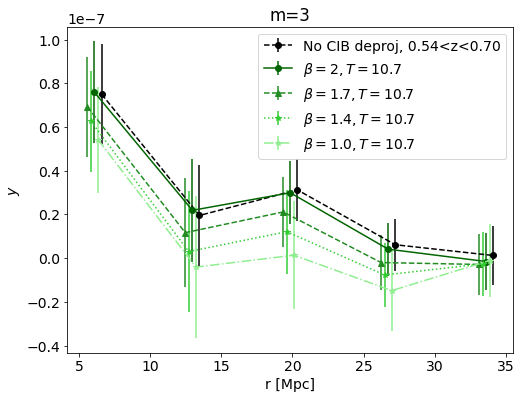

0.7901894004493666 Pearson correlation coefficient
0.9830378325416927 Pearson correlation coefficient
0.8782456225040645 Pearson correlation coefficient
0.9915562332898133 Pearson correlation coefficient
0.8086614600072235 Pearson correlation coefficient


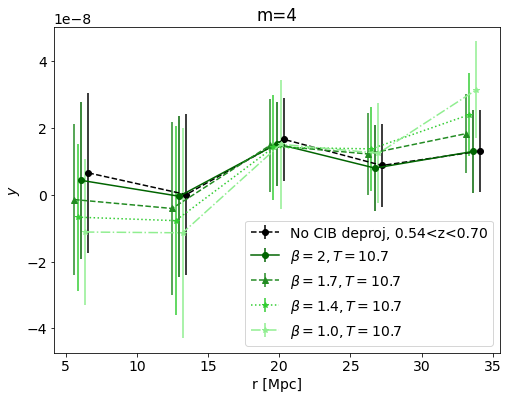

retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_yy_4096_hpx_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx_redmapper_lambdagt20_combined_2693_3193Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_2643_3243Mpc_24reg_m0to5_profiles.pkl
retrieving data from /mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/ilc

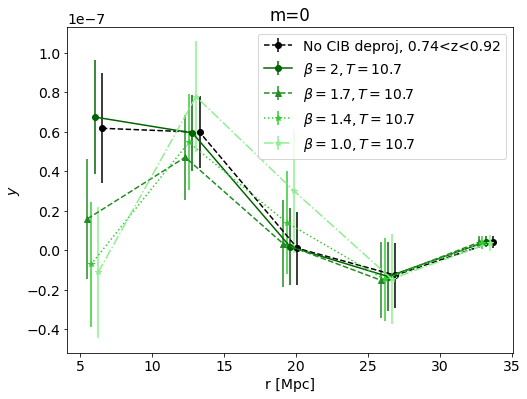

0.8524986636017944 Pearson correlation coefficient
0.9831520967090362 Pearson correlation coefficient
0.9533998354375336 Pearson correlation coefficient
0.992215663236609 Pearson correlation coefficient
0.9054257034608658 Pearson correlation coefficient


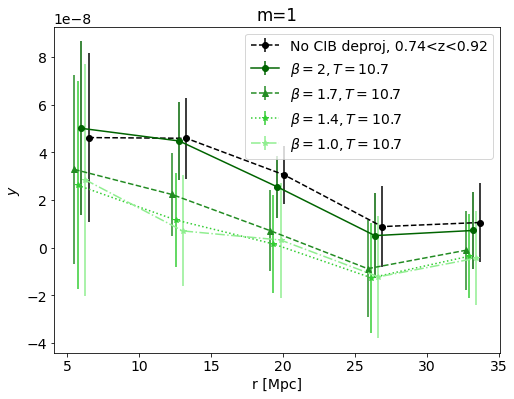

-0.7640114724091548 Pearson correlation coefficient
0.997826112095783 Pearson correlation coefficient
0.4310933619137886 Pearson correlation coefficient
0.9943304382776365 Pearson correlation coefficient
-0.61386559531827 Pearson correlation coefficient


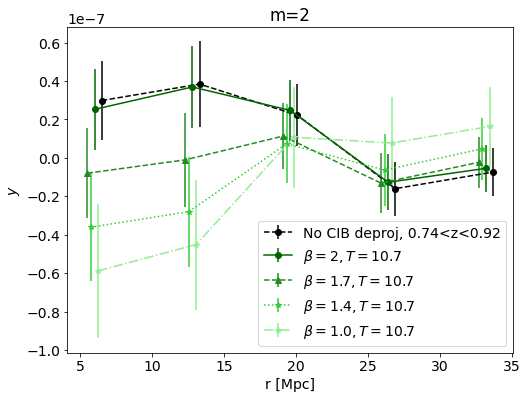

0.4886072094140058 Pearson correlation coefficient
0.915627886009604 Pearson correlation coefficient
0.5949705384017467 Pearson correlation coefficient
0.9337713336737941 Pearson correlation coefficient
0.4904451762915743 Pearson correlation coefficient


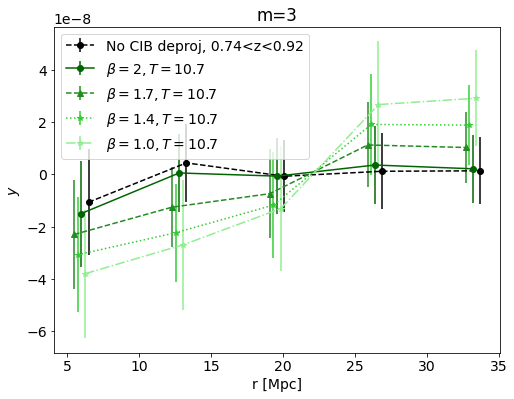

0.889962299884731 Pearson correlation coefficient
0.9995361896315886 Pearson correlation coefficient
0.9877777160633571 Pearson correlation coefficient
0.9997081580437804 Pearson correlation coefficient
0.9519189656593812 Pearson correlation coefficient


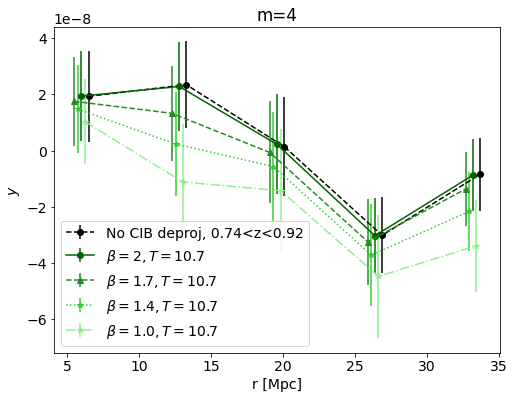

<Figure size 576x432 with 0 Axes>

In [8]:
# Comparing CIB-deprojected vs nothing-deprojected
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24

b = 8
print("Red. chi-squared between fiducial CIB-deproj and no-deproj:")
chi2_fullcorr_1p0 = np.zeros([5, len(dbins)])
chi2_fullcorr_1p4 = np.zeros([5, len(dbins)])
chi2_fullcorr_ul = np.zeros([5, len(dbins)])
chi2_fullcorr_mid = np.zeros([5, len(dbins)])
chi2_fullcorr_lr = np.zeros([5, len(dbins)])
chi2_nocorr_1p0 = np.zeros([5, len(dbins)])
chi2_nocorr_1p4 = np.zeros([5, len(dbins)])
chi2_nocorr_ul = np.zeros([5, len(dbins)])
chi2_nocorr_mid = np.zeros([5, len(dbins)])
chi2_nocorr_lr = np.zeros([5, len(dbins)])
                          
actpath = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
for c,dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    
    mapstr = f'ilc_SZ_yy_4096_hpx'
    # ystr = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    act_nodeproj, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
    
    
    
    mapstr = f'ilc_SZ_deproj_cib_1.2_24.0_yy_4096_hpx'
    act_cibd_ul, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
    
    mapstr = f'ilc_SZ_deproj_cib_1.7_10.7_yy_4096_hpx'
    act_cibd_mid, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
    
    mapstr = f'ilc_SZ_deproj_cib_2.0_10.7_yy_4096_hpx'
    act_cibd_lr, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
    
    mapstr = f'ilc_SZ_deproj_cib_1.4_10.7_yy_4096_hpx'
    act_cibd_1p4, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
    
    mapstr = f'ilc_SZ_deproj_cib_1.0_10.7_yy_4096_hpx'
    act_cibd_1p0, (zlow,zhi) = cpp.retrieve_stack_info(actpath, mapstr, pt_selection_str, dbin, remove_r30=True, cc=False)
   
    print("Total Peaks!", act_nodeproj.Npks_tot, act_cibd_ul.Npks_tot, act_cibd_lr.Npks_tot, act_cibd_mid.Npks_tot, act_cibd_1p4.Npks_tot, act_cibd_1p0.Npks_tot)
    nbin = len(act_cibd_ul.r_binned)
    dof = nbin
    # get the chi squared between each of these
    nullvec = np.zeros(nbin)
    for m in range(5):
        chisq_nocorr_1p0_m = st.chisq(act_cibd_1p0.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_1p0.covmat_binned[m], act_nodeproj.covmat_binned[m])
        chisq_fullcorr_1p0_m = st.chisq(act_cibd_1p0.avg_profiles_binned[m], nullvec, act_cibd_1p0.covmat_binned[m])
        # chisq_fullcorr_1p0_m = st.chisq(act_nodeproj.avg_profiles_binned[m], nullvec, act_nodeproj.covmat_binned[m])
        # compute the Pearson correlation coefficient
        pearson_corr = np.corrcoef(act_cibd_1p0.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m])[0,1]
        print(pearson_corr, "Pearson correlation coefficient")
        chisq_nocorr_ul_m = st.chisq(act_cibd_ul.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_ul.covmat_binned[m], act_nodeproj.covmat_binned[m])
        chisq_fullcorr_ul_m = st.chisq(act_cibd_ul.avg_profiles_binned[m], nullvec, act_cibd_ul.covmat_binned[m])
        # chisq_fullcorr_ul_m = st.chisq(act_nodeproj.avg_profiles_binned[m], nullvec, act_nodeproj.covmat_binned[m])
        pearson_corr = np.corrcoef(act_cibd_ul.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m])[0,1]
        print(pearson_corr, "Pearson correlation coefficient")
        chisq_nocorr_mid_m = st.chisq(act_cibd_mid.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_mid.covmat_binned[m], act_nodeproj.covmat_binned[m])
        chisq_fullcorr_mid_m = st.chisq(act_cibd_mid.avg_profiles_binned[m], nullvec, act_cibd_mid.covmat_binned[m])
        pearson_corr = np.corrcoef(act_cibd_mid.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m])[0,1]
        print(pearson_corr, "Pearson correlation coefficient")
        chisq_nocorr_lr_m = st.chisq(act_cibd_lr.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_lr.covmat_binned[m], act_nodeproj.covmat_binned[m])
        chisq_fullcorr_lr_m = st.chisq(act_cibd_lr.avg_profiles_binned[m], nullvec, act_cibd_lr.covmat_binned[m])
        pearson_corr = np.corrcoef(act_cibd_lr.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m])[0,1]
        print(pearson_corr, "Pearson correlation coefficient")
        chisq_nocorr_1p4_m = st.chisq(act_cibd_1p4.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m], act_cibd_1p4.covmat_binned[m], act_nodeproj.covmat_binned[m])
        chisq_fullcorr_1p4_m = st.chisq(act_cibd_1p4.avg_profiles_binned[m], nullvec, act_cibd_1p4.covmat_binned[m])
        pearson_corr = np.corrcoef(act_cibd_1p4.avg_profiles_binned[m], act_nodeproj.avg_profiles_binned[m])[0,1]
        print(pearson_corr, "Pearson correlation coefficient")
        # a more basic chisquare test
        
        chi2_nocorr_1p0[m,c] = chisq_nocorr_1p0_m
        chi2_fullcorr_1p0[m,c] = chisq_fullcorr_1p0_m
        chi2_nocorr_ul[m,c] = chisq_nocorr_ul_m
        chi2_fullcorr_ul[m,c] = chisq_fullcorr_ul_m
        chi2_nocorr_mid[m,c] = chisq_nocorr_mid_m
        chi2_fullcorr_mid[m,c] = chisq_fullcorr_mid_m
        chi2_nocorr_lr[m,c] = chisq_nocorr_lr_m
        chi2_fullcorr_lr[m,c] = chisq_fullcorr_lr_m
        chi2_nocorr_1p4[m,c] = chisq_nocorr_1p4_m
        chi2_fullcorr_1p4[m,c] = chisq_fullcorr_1p4_m
        # print("Systematic error:", (act_cibd_1p0.avg_profiles_binned[m][0:3]-act_nodeproj.avg_profiles_binned[m][0:3])/act_nodeproj.avg_profiles_binned[m][0:3]*100, "percent")
        plt.errorbar(act_nodeproj.r_binned+.5, act_nodeproj.avg_profiles_binned[m], yerr=act_nodeproj.errors_binned[m], fmt='o', linestyle='--', label=r'No CIB deproj, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value), color='black') 
        # plt.errorbar(act_cibd_fid.r_binned-.5, act_cibd_fid.avg_profiles_binned[m], yerr=act_cibd_fid.errors_binned[m], fmt='o', linestyle='--', label=r'Standard CIB deproj')
        # plt.errorbar(act_cibd_ul.r_binned+.25, act_cibd_ul.avg_profiles_binned[m], yerr=act_cibd_ul.errors_binned[m], fmt='o', linestyle='--', label=r'$\beta=1.2, T=24$') 
        plt.errorbar(act_cibd_lr.r_binned, act_cibd_lr.avg_profiles_binned[m], yerr=act_cibd_lr.errors_binned[m], fmt='o', linestyle='solid', label=r'$\beta=2, T=10.7$'.format(zlow.value, zhi.value), color='darkgreen') 
        plt.errorbar(act_cibd_mid.r_binned-.5, act_cibd_mid.avg_profiles_binned[m], yerr=act_cibd_mid.errors_binned[m], fmt='^', linestyle='--', label=r'$\beta=1.7, T=10.7$', color='forestgreen')
        plt.errorbar(act_cibd_1p4.r_binned-.25, act_cibd_1p4.avg_profiles_binned[m], yerr=act_cibd_1p4.errors_binned[m], fmt='*', linestyle='dotted', label=r'$\beta=1.4, T=10.7$', color='limegreen') 
        plt.errorbar(act_cibd_1p0.r_binned+.25, act_cibd_1p0.avg_profiles_binned[m], yerr=act_cibd_1p0.errors_binned[m], fmt='*', linestyle='dashdot', label=r'$\beta=1.0, T=10.7$', color='lightgreen') 

        plt.legend()
        plt.ylabel("$y$")
        plt.title(f"m={m}")
        plt.xlabel("r [Mpc]")
        if m==2 and c==3:
            plt.savefig(f"../plots/paper2/cib_deproj_m{m}_z{c+1}.png", dpi=300, bbox_inches='tight')
        plt.show()
        plt.clf()
        
    # chi squared with respect to null
    # null_vector = np.zeros(len(act_cibd_fid.avg_profiles_binned[m]))
    # print(np.sqrt(st.chisq(act_cibd_fid.avg_profiles_binned[m], null_vector, act_cibd_fid.covmat_binned[m])/4.), np.sqrt(st.chisq(act_cibd_1p15.avg_profiles_binned[m], null_vector, act_cibd_1p15.covmat_binned[m])/4.), np.sqrt(st.chisq(act_nodeproj.avg_profiles_binned[m], null_vector, act_nodeproj.covmat_binned[m])/4.))

    # print("SNR from PTE", st.snr_from_pte(act_cibd_fid.avg_profiles_binned[m], np.zeros(len(act_cibd_fid.avg_profiles_binned[m])), act_cibd_fid.covmat_binned[m]))
    # plt.imshow(act_cibd_fid.covmat_binned[m])
    # plt.colorbar()
    # plt.show()
    # plt.clf()
        

0.00011720037778178386 0.9465225134369014


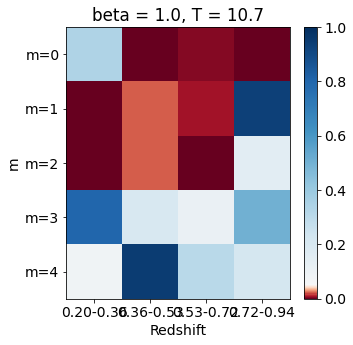

9.707616624577137e-07 0.8721144853092405


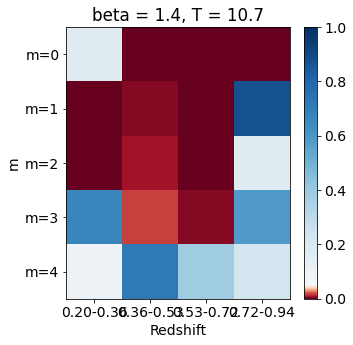

5.271315875042242e-12 0.9857717343751033


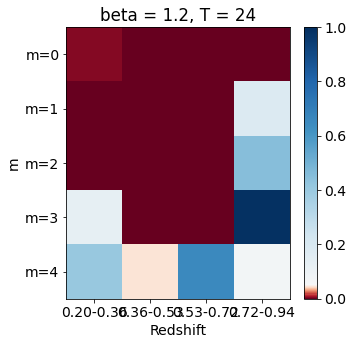

2.386188924065862e-10 0.792366345677673


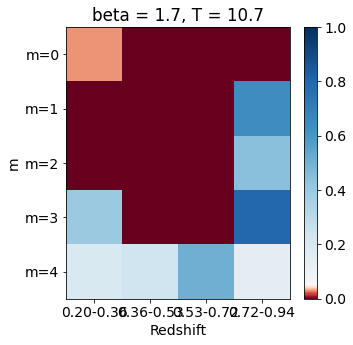

8.7295070837791e-12 0.988165010658314


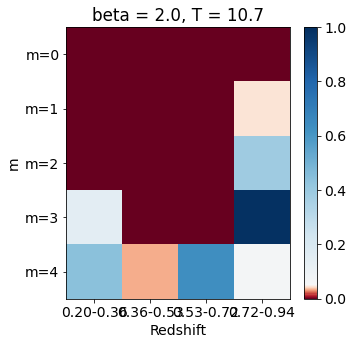

0.04216922551390503 0.9924946975094089


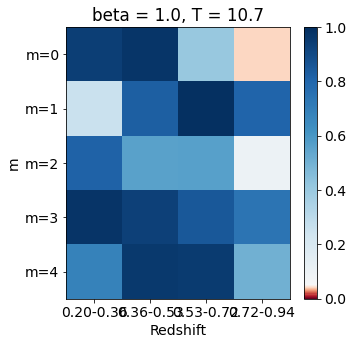

0.17456900719075472 0.9900262708301308


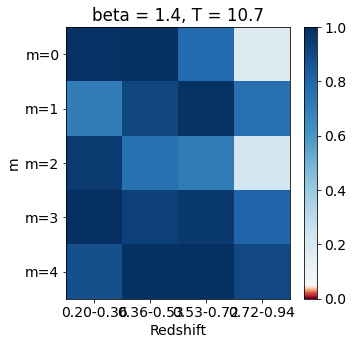

0.9842819026769146 0.9999997505107815


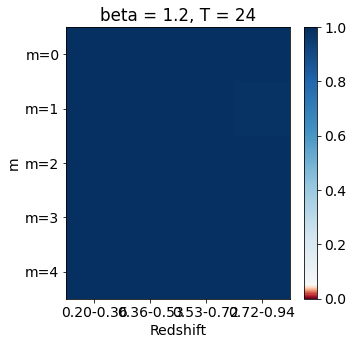

0.6910777025425872 0.999302289547287


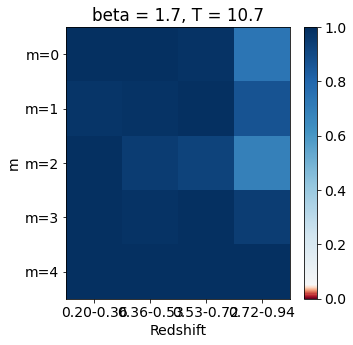

0.9990620433884384 0.9999999763530294


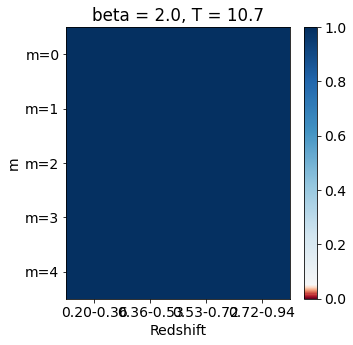

In [9]:
def plot_pvals(chi2_array, dof, title):
    pvals = sp.stats.chi2.sf(chi2_array, dof)
    # plot all the p-values related to the chi-squares
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')
    pval_plot = ax.imshow(pvals, cmap=scmap, vmin=0, vmax=1, aspect='auto')
    print(min(pvals.flatten()), max(pvals.flatten()))
    ax.set_xticks(np.arange(len(dbins)))
    ax.set_yticks(np.arange(5))
    ax.set_xticklabels([f"{z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc).value:.2f}-{z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc).value:.2f}" for dbin in dbins])
    ax.set_yticklabels([f"m={m}" for m in range(5)])
    ax.set_xlabel("Redshift")
    ax.set_ylabel("m")
    cbar = fig.colorbar(pval_plot)
    plt.title(title)
    plt.show()

plot_pvals(chi2_fullcorr_1p0, dof, title='beta = 1.0, T = 10.7')
plot_pvals(chi2_fullcorr_1p4, dof, title='beta = 1.4, T = 10.7')
plot_pvals(chi2_fullcorr_ul, dof, title='beta = 1.2, T = 24')
plot_pvals(chi2_fullcorr_mid, dof, title='beta = 1.7, T = 10.7')
plot_pvals(chi2_fullcorr_lr, dof, title='beta = 2.0, T = 10.7')
plot_pvals(chi2_nocorr_1p0, dof, title='beta = 1.0, T = 10.7')
plot_pvals(chi2_nocorr_1p4, dof, title='beta = 1.4, T = 10.7')
plot_pvals(chi2_nocorr_ul, dof, title='beta = 1.2, T = 24')
plot_pvals(chi2_nocorr_mid, dof, title='beta = 1.7, T = 10.7')
plot_pvals(chi2_nocorr_lr, dof, title='beta = 2.0, T = 10.7')


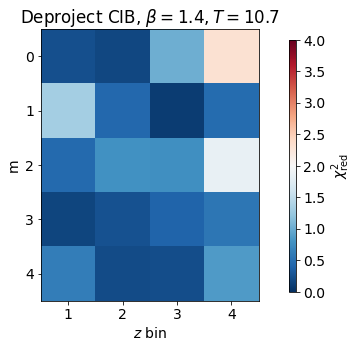

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# scmap = st.shiftedColorMap(plt.cm.RdBu_r, midpoint=2, name='shifted')
pval = 1 - sp.stats.chi2.cdf(chisq_full, dof)
scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')

# snr_plot = ax.imshow(pval, cmap=scmap, vmin=0, vmax=1)
snr_plot = ax.imshow(chi_red_full, cmap='RdBu_r', vmin=0, vmax=4)
ax.set_ylabel("m")
# axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
# replace x ticks with r values
ax.set_xticks(np.arange(len(dbins)))
ax.set_xticklabels(["1", "2", "3", "4"])
# ax.set_xticklabels([f"{np.round(z_at_value(cosmo.comoving_distance, (dbin[0])*u.Mpc).value,2)} - {np.round(z_at_value(cosmo.comoving_distance, (dbin[1])*u.Mpc).value,2)}" for dbin in dbins], rotation=45)
ax.set_xlabel(r"$z$ bin")
plt.title(r"Deproject CIB, $\beta=1.4, T=10.7$")
# add an axis for a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(snr_plot, cax=cbar_ax, label=r"$\chi^2_{\rm{red}}$")
# centered title
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/cib_deproj_nulltests_1p4_10p7.pdf", bbox_inches="tight")
plt.show()

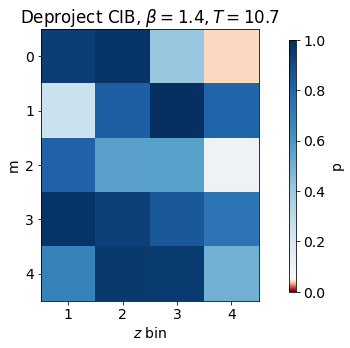

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# scmap = st.shiftedColorMap(plt.cm.RdBu_r, midpoint=2, name='shifted')
pval = 1 - sp.stats.chi2.cdf(chisq_full, dof)
scmap = st.shiftedColorMap(plt.cm.RdBu, midpoint=0.05, name='shifted')

snr_plot = ax.imshow(pval, cmap=scmap, vmin=0, vmax=1)
ax.set_ylabel("m")
# axs[c].set_title(f"z = {np.round(zlow.value,2)} - {np.round(zhi.value,2)}")
# replace x ticks with r values
ax.set_xticks(np.arange(len(dbins)))
ax.set_xticklabels(["1", "2", "3", "4"])
# ax.set_xticklabels([f"{np.round(z_at_value(cosmo.comoving_distance, (dbin[0])*u.Mpc).value,2)} - {np.round(z_at_value(cosmo.comoving_distance, (dbin[1])*u.Mpc).value,2)}" for dbin in dbins], rotation=45)
ax.set_xlabel(r"$z$ bin")
plt.title(r"Deproject CIB, $\beta=1.4, T=10.7$")
# add an axis for a colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(snr_plot, cax=cbar_ax, label=r"p")
# centered title
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/cib_deproj_nulltests_1p4_10p7.pdf", bbox_inches="tight")
plt.show()